In [255]:
"""
log_analysis.ipynb
"""

'\nlog_analysis.ipynb\n'

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
### GLOBASL VARIABLES ###
SEED = 1234
LOG_DIR = 'logs'            # directory with input logs

### INPUT PARAMETERS ###
INPUT_LOG = 'eventlog_anonymous.csv'    # log file name
CASE_ID_COL = 'case:concept:name'       # case ID column name

In [258]:
path_csv = Path(LOG_DIR) / INPUT_LOG
log_df = pd.read_csv(path_csv, sep =";", encoding='utf-8', low_memory=False)

In [259]:
print("\n--- Dataset Rows preview ---")
log_df.head(5)


--- Dataset Rows preview ---


,case:concept:name,concept:name,time:timestamp,dur_prev,mean_prev,label,diagnosi,surgery1,surgery2,OR,codice_priorita,reparto_provenienza,reparto_ricover,equipe,anast_equipe,altri_operatori
0,TCOPER/013146/2023,ingresso blocco,11/04/2023 08:00,0.0,0.00,1,444.22,co.39.25,co.nan,Sala 2 - Blocco 07,NaN,1 - Ricovero ordinario,1401- Chirurgia Vascolare Ospedaliera - Degenz...,EQUIPE_4,ANASTRUEQUIPE_0,ALTRIOPERATORI_56
1,TCOPER/013146/2023,ingresso OR,11/04/2023 08:05,5.0,13.26,1,444.22,co.39.25,co.nan,Sala 2 - Blocco 07,NaN,1 - Ricovero ordinario,1401- Chirurgia Vascolare Ospedaliera - Degenz...,EQUIPE_4,ANASTRUEQUIPE_0,ALTRIOPERATORI_56
2,TCOPER/013146/2023,inizio anestesia,11/04/2023 08:10,5.0,4.57,1,444.22,co.39.25,co.nan,Sala 2 - Blocco 07,NaN,1 - Ricovero ordinario,1401- Chirurgia Vascolare Ospedaliera - Degenz...,EQUIPE_4,ANASTRUEQUIPE_0,ALTRIOPERATORI_56
3,TCOPER/013146/2023,inizio intervento,11/04/2023 09:10,60.0,68.17,1,444.22,co.39.25,co.nan,Sala 2 - Blocco 07,NaN,1 - Ricovero ordinario,1401- Chirurgia Vascolare Ospedaliera - Degenz...,EQUIPE_4,ANASTRUEQUIPE_0,ALTRIOPERATORI_56
4,TCOPER/013146/2023,fine intervento,11/04/2023 17:30,500.0,275.96,1,444.22,co.39.25,co.nan,Sala 2 - Blocco 07,NaN,1 - Ricovero ordinario,1401- Chirurgia Vascolare Ospedaliera - Degenz...,EQUIPE_4,ANASTRUEQUIPE_0,ALTRIOPERATORI_56


In [260]:
print("\n--- Dataset Overview ---")
print(log_df.info())


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8088 entries, 0 to 8087
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case:concept:name    8088 non-null   object 
 1   concept:name         8088 non-null   object 
 2   time:timestamp       8088 non-null   object 
 3   dur_prev             8088 non-null   float64
 4   mean_prev            8088 non-null   float64
 5   label                8088 non-null   int64  
 6   diagnosi             8088 non-null   object 
 7   surgery1             8088 non-null   object 
 8   surgery2             8088 non-null   object 
 9   OR                   8088 non-null   object 
 10  codice_priorita      6720 non-null   object 
 11  reparto_provenienza  8088 non-null   object 
 12  reparto_ricover      8088 non-null   object 
 13  equipe               8088 non-null   object 
 14  anast_equipe         8088 non-null   object 
 15  altri_operat

In [261]:
# Count missing (empty) values per column and total
missing_counts = log_df.isnull().sum() + (log_df == '').sum()
print("\n--- Missing Values per Column ---")
print(missing_counts)
print("\nTotal missing values in the dataset:", missing_counts.sum())


--- Missing Values per Column ---
case:concept:name         0
concept:name              0
time:timestamp            0
dur_prev                  0
mean_prev                 0
label                     0
diagnosi                  0
surgery1                  0
surgery2                  0
OR                        0
codice_priorita        1368
reparto_provenienza       0
reparto_ricover           0
equipe                    0
anast_equipe              0
altri_operatori           0
dtype: int64

Total missing values in the dataset: 1368


In [262]:
# List of unique values per column
excluded_cols = [CASE_ID_COL, 'time:timestamp', 'dur_prev', 'mean_prev'] # Columns to be exclued from the analysis
print("\n--- Unique Values per Column ---")
for col in log_df.columns:
    if col in excluded_cols:
        print(f"Skipping '{col}'...")
        continue
    unique_vals = log_df[col].unique()
    print(f"\n{col} ({len(unique_vals)} unique):\n{unique_vals}")


--- Unique Values per Column ---
Skipping 'case:concept:name'...

concept:name (8 unique):
['ingresso blocco' 'ingresso OR' 'inizio anestesia' 'inizio intervento'
 'fine intervento' 'fine anestesia' 'uscita OR' 'uscita blocco']
Skipping 'time:timestamp'...
Skipping 'dur_prev'...
Skipping 'mean_prev'...

label (2 unique):
[1 0]

diagnosi (84 unique):
['444.22' '441.4' '434.00' '433.11' '433.10' '410.10' '996.62' '454.8'
 '996.73' '482.9' '454.9' '440.23' '729.5' '440.22' '442.3' '440.21'
 '438.85' '440.20' '440.0' '368.2' '440.24' '785.4' '707.19' '447.0'
 '998.32' '433.30' '941.40' '442.81' '707.13' '780.6' '557.1' '442.0'
 '444' '995.91' '227.5' '442.2' '447.1' '307.89' '996.1' '433.00' '441.7'
 '441.2' '586' '682.6' '454.1' '435.9' '441.3' '945.41' '707.10' '441.02'
 '442.9' '998.6' '433.80' '434.01' '441.9' '444.9' '747.64' '447.8'
 '433.31' '441' '444.0' '747.9' '459.81' '755.69' '315.09' '250.70'
 '453.40' '312.39' '904.0' '707.15' '442.89' '747.81' '237.3' '225.8'
 '557.0' '682.


--- Label Distribution ---
0    4552
1    3536
Name: label, dtype: int64


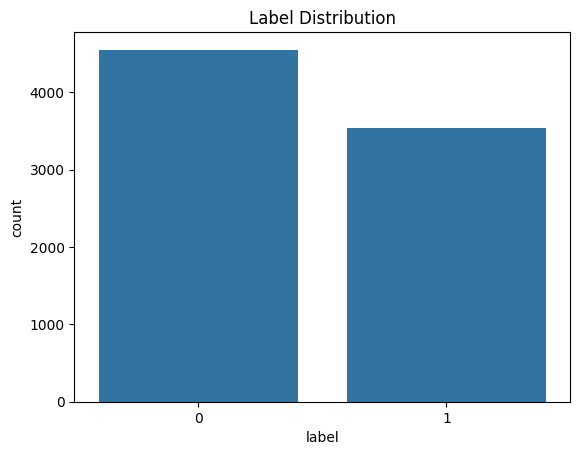

In [263]:
# Label distribution
print("\n--- Label Distribution ---")
print(log_df["label"].value_counts())
sns.countplot(data=log_df, x="label")
plt.title("Label Distribution")
plt.show()

In [264]:
# Summary statistics for all columns
print("\n--- Feature Summary ---")
summary = log_df.describe(include='all').T
summary["unique_values"] = log_df.nunique()
summary["most_frequent_ratio"] = log_df.apply(lambda col: col.value_counts(normalize=True, dropna=False).max())
summary = summary.sort_values(by="most_frequent_ratio", ascending=False)
print(summary[["unique_values", "most_frequent_ratio"]])


--- Feature Summary ---
                     unique_values  most_frequent_ratio
anast_equipe                     3             0.998022
reparto_provenienza              3             0.878338
reparto_ricover                  3             0.877349
surgery2                        22             0.803165
OR                               2             0.587537
label                            2             0.562809
codice_priorita                  4             0.374876
surgery1                        50             0.298714
diagnosi                        84             0.256182
dur_prev                       179             0.250371
equipe                          12             0.200791
mean_prev                      206             0.126855
concept:name                     8             0.125000
altri_operatori                245             0.064293
case:concept:name             1011             0.000989
time:timestamp                7086             0.000371


In [265]:
# Identify almost-constant features (e.g., >95% same value)
threshold = 0.95
almost_constant_features = summary[summary["most_frequent_ratio"] > threshold].index.tolist()
print("\n--- Almost-constant Features (>95% same value) ---")
print(almost_constant_features)


--- Almost-constant Features (>95% same value) ---
['anast_equipe']



--- Correlation Matrix ---
           dur_prev  mean_prev     label
dur_prev   1.000000   0.914941  0.098118
mean_prev  0.914941   1.000000 -0.005271
label      0.098118  -0.005271  1.000000


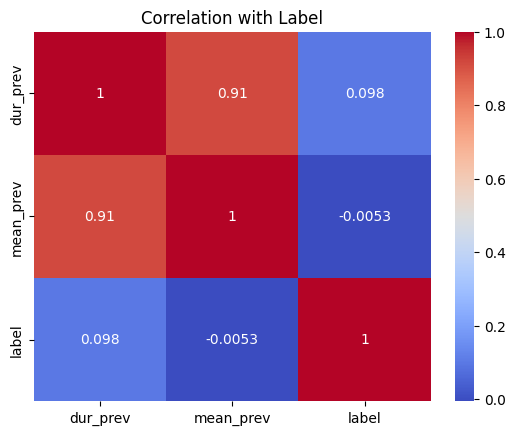

In [266]:
# Compute correlation matrix for numerical features
# First, convert numeric columns (e.g., dur_prev, mean_prev, label)
df_numeric = log_df[["dur_prev", "mean_prev", "label"]].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation with Label")
plt.show()